In [1]:
from main import file_locate
from ml_models import logistic_regression
from ml_models import naive_bayes
from ml_models import k_nearest_neighbors
from ml_models import support_vector
from ml_models import gradient_boost
from ml_models import random_forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def analysis(labels_test, labels_pred):
    cm = confusion_matrix(labels_test, labels_pred)
    print(cm)
    accuracy = accuracy_score(labels_test, labels_pred)
    print("Accuracy: ", accuracy)
    f1 = f1_score(labels_test, labels_pred)
    print("F1: ", f1)
    report = classification_report(labels_test, labels_pred)
    print("Classification Report:")
    print(report)

In [3]:
def auc(labels_test, labels_pred):
    fpr, tpr, thresholds = roc_curve(labels_test, labels_pred)
    auc = roc_auc_score(labels_test, labels_pred)

    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [4]:
def precision_recall(labels_test, labels_pred):
    precision, recall, _ = precision_recall_curve(labels_test, labels_pred)
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

In [ ]:
def learning_curve(features, labels):
    train_sizes, train_scores, test_scores = learning_curve(model, features, labels, cv=10, scoring='f1',
                                                            n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [5]:
file_locate('ml-analysis.ipynb')
filename = 'cleaned-framingham.csv'

Logistic Regression
[[1700  780]
 [1050 1430]]
Accuracy:  0.6310483870967742
F1:  0.6098081023454159
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      2480
           1       0.65      0.58      0.61      2480

    accuracy                           0.63      4960
   macro avg       0.63      0.63      0.63      4960
weighted avg       0.63      0.63      0.63      4960

[[428 193]
 [ 55  56]]
Accuracy:  0.6612021857923497
F1:  0.3111111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       621
           1       0.22      0.50      0.31       111

    accuracy                           0.66       732
   macro avg       0.56      0.60      0.54       732
weighted avg       0.79      0.66      0.70       732



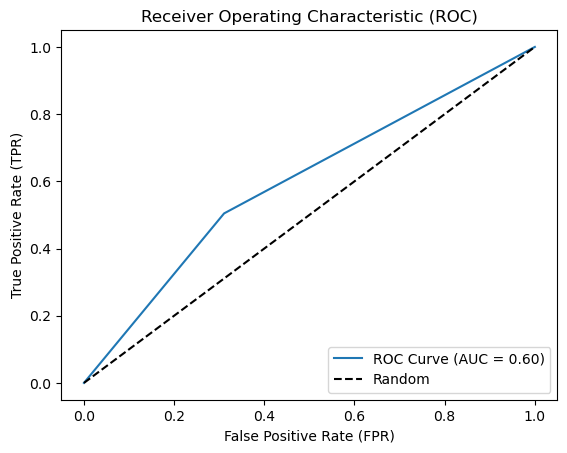

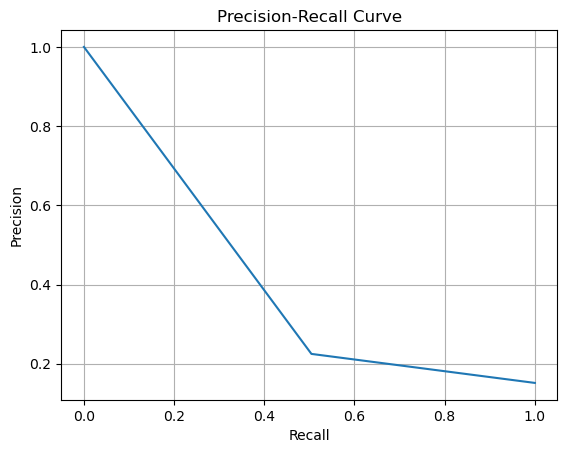

In [6]:
labels_train, labels_train_pred, labels_test, labels_pred = logistic_regression.logistic_regression(filename)
# logistic_regression.hyperparameter_search(filename)
# {'C': 0.01, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)

Naive Bayes:
Best alpha 0.001
Best f1: 0.32091690544412604
Best threshold 0.5
Test f1 0.32091690544412604
[[1767  713]
 [1112 1368]]
Accuracy:  0.6320564516129032
F1:  0.5998684499013374
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      2480
           1       0.66      0.55      0.60      2480

    accuracy                           0.63      4960
   macro avg       0.64      0.63      0.63      4960
weighted avg       0.64      0.63      0.63      4960

[[439 182]
 [ 55  56]]
Accuracy:  0.6762295081967213
F1:  0.32091690544412604
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       621
           1       0.24      0.50      0.32       111

    accuracy                           0.68       732
   macro avg       0.56      0.61      0.55       732
weighted avg       0.79      0.68      0.72       732



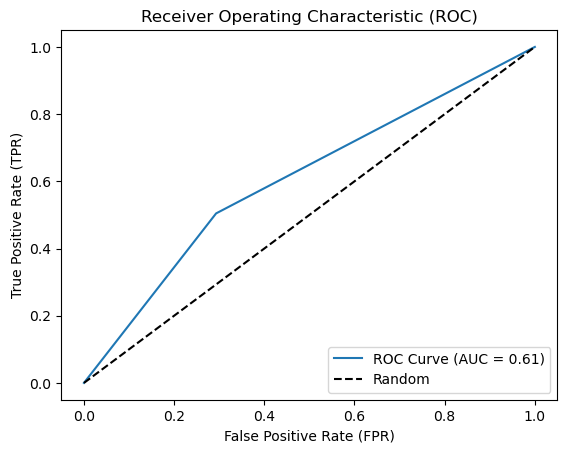

In [7]:
labels_train, labels_train_pred, labels_test, labels_pred = naive_bayes.naive_bayes(filename)
naive_bayes.find_alpha(filename)
naive_bayes.find_threshold(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

K-Nearest Neighbors:
Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Best Hyperparameters: {'algorithm': 'brute', 'metric': 'chebyshev', 'n_neighbors': 2, 'weights': 'distance'}
F1: 0.22439024390243903
[[2193  287]
 [   6 2474]]
Accuracy:  0.9409274193548387
F1:  0.944094638427781
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2480
           1       0.90      1.00      0.94      2480

    accuracy                           0.94      4960
   macro avg       0.95      0.94      0.94      4960
weighted avg       0.95      0.94      0.94      4960

[[507 114]
 [ 71  40]]
Accuracy:  0.7472677595628415
F1:  0.3018867924528301
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       621
           1       0.26      0.36      0.30       111

    accuracy                           0.75       732
   macro avg       0.57      0.59 

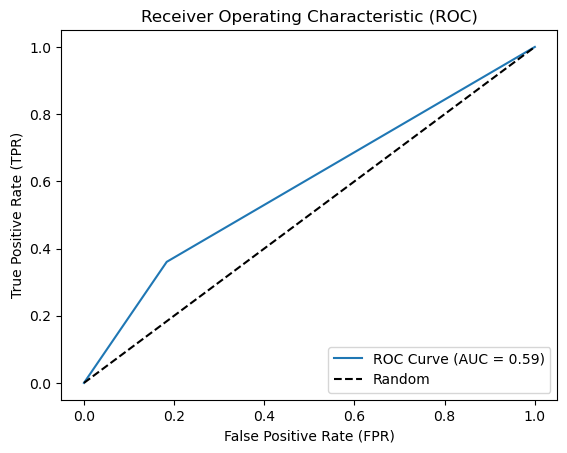

In [8]:
labels_train, labels_train_pred, labels_test, labels_pred = k_nearest_neighbors.k_nearest(filename)
k_nearest_neighbors.grid_search(filename)
# {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

In [9]:
labels_train, labels_train_pred, labels_test, labels_pred = support_vector.support_vector(filename)
support_vector.grid_search(filename)
#{'C': 1000.0, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

SVM: 
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


XGBoost: 
[[2477    3]
 [   1 2479]]
Accuracy:  0.9991935483870967
F1:  0.9991938734381297
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2480
           1       1.00      1.00      1.00      2480

    accuracy                           1.00      4960
   macro avg       1.00      1.00      1.00      4960
weighted avg       1.00      1.00      1.00      4960

[[557  64]
 [ 85  26]]
Accuracy:  0.796448087431694
F1:  0.25870646766169153
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       621
           1       0.29      0.23      0.26       111

    accuracy                           0.80       732
   macro avg       0.58      0.57      0.57       732
weighted avg       0.78      0.80      0.79       732



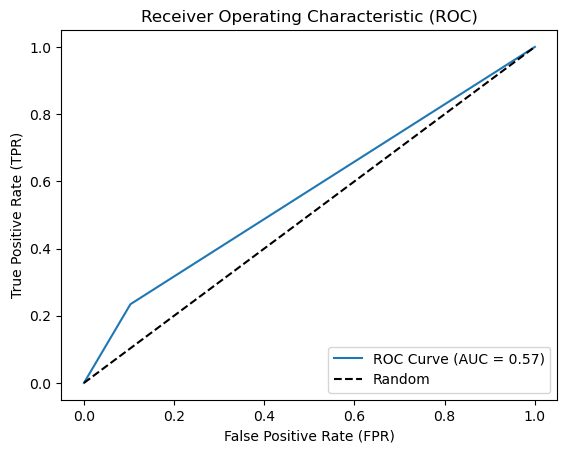

In [ ]:
labels_train, labels_train_pred, labels_test, labels_pred = gradient_boost.gradient_boost(filename)
gradient_boost.grid_search(filename)
# {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.8}
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

Random Forest
[[2480    0]
 [   0 2480]]
Accuracy:  1.0
F1:  1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2480
           1       1.00      1.00      1.00      2480

    accuracy                           1.00      4960
   macro avg       1.00      1.00      1.00      4960
weighted avg       1.00      1.00      1.00      4960

[[593  28]
 [ 93  18]]
Accuracy:  0.8346994535519126
F1:  0.22929936305732485
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       621
           1       0.39      0.16      0.23       111

    accuracy                           0.83       732
   macro avg       0.63      0.56      0.57       732
weighted avg       0.79      0.83      0.80       732



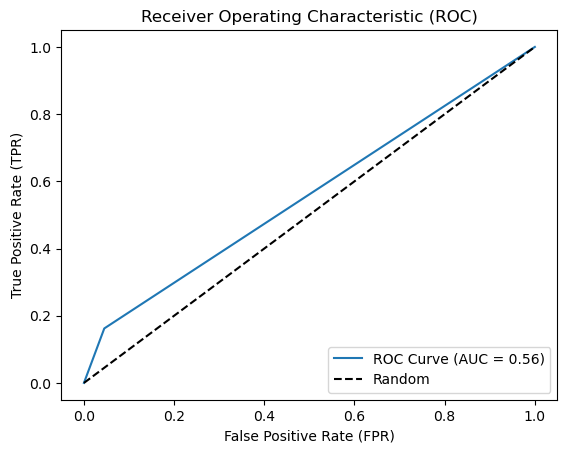

In [ ]:
labels_train, labels_train_pred, labels_test, labels_pred = random_forest.random_forest(filename)
random_forest.grid_search(filename)
# {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)